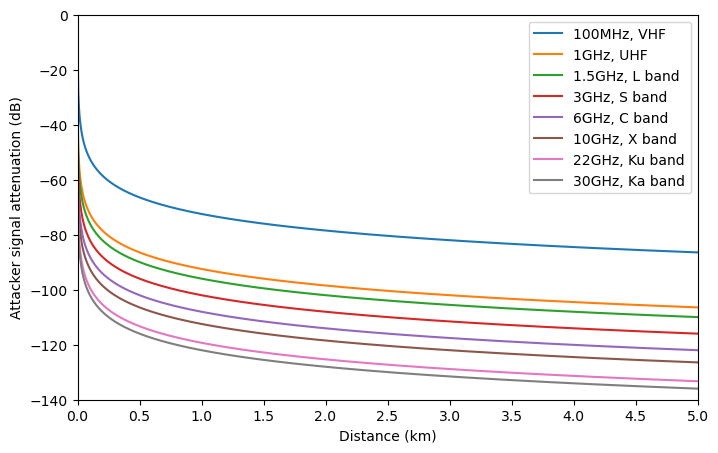

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def fspl(d_m, f_MHz):
    return -1 * (20 * np.log10(d_m) + 20 * np.log10(f_MHz) -27.55)

distances = list(range(1, 8000, 5))

fig, axs = plt.subplots(1, 1, figsize=(8,5))
plt.setp(axs, ylim=[-140, 0])
plt.setp(axs, xlim=[0, 5000])

axs.plot(distances, list(map(lambda d: fspl(d, 100), distances)), label="100MHz, VHF")
axs.plot(distances, list(map(lambda d: fspl(d, 1000), distances)), label="1GHz, UHF")
axs.plot(distances, list(map(lambda d: fspl(d, 1500), distances)), label="1.5GHz, L band")
axs.plot(distances, list(map(lambda d: fspl(d, 3000), distances)), label="3GHz, S band")
axs.plot(distances, list(map(lambda d: fspl(d, 6000), distances)), label="6GHz, C band")
axs.plot(distances, list(map(lambda d: fspl(d, 10000), distances)), label="10GHz, X band")
axs.plot(distances, list(map(lambda d: fspl(d, 22000), distances)), label="22GHz, Ku band")
axs.plot(distances, list(map(lambda d: fspl(d, 30000), distances)), label="30GHz, Ka band")

plt.xticks(np.arange(0, 5001, 500), np.arange(0, 5.1, 0.5))

plt.ylabel('Attacker signal attenuation (dB)')
plt.xlabel('Distance (km)')

axs.legend()
plt.savefig("attacker_path_loss.pdf", bbox_inches='tight')

plt.show()